In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
heart_csv=pd.read_csv('heart303.csv')
heart_csv.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
heart_csv.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
duplicated=heart_csv.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are : {}'.format(duplicated))
else:
        print('no values duplicated in dataset')

Duplicated rows in dataset are : 1


In [5]:
heart_csv = heart_csv.drop_duplicates()

In [6]:
duplicated=heart_csv.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are : {}'.format(duplicated))
else:
        print('no values duplicated in dataset')

no values duplicated in dataset


In [7]:
heart_csv.shape

(302, 14)

In [8]:
heart_csv.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

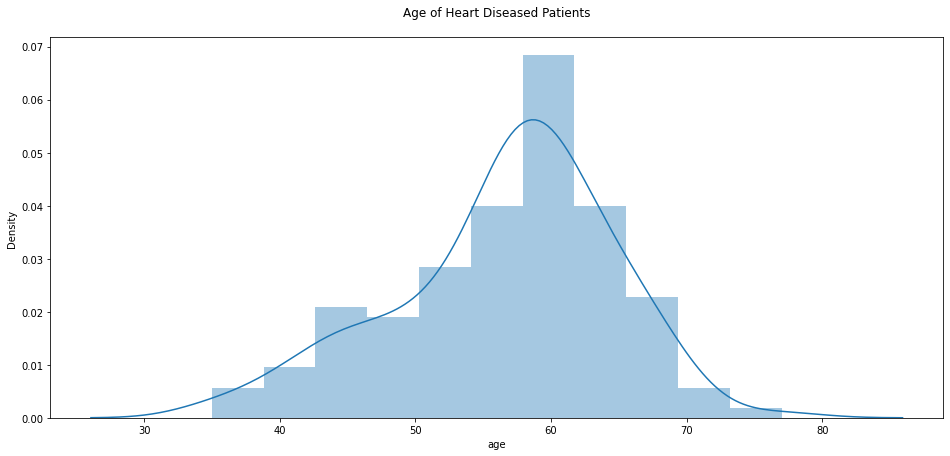

In [9]:
plt.figure(figsize=(16,7))

sns.distplot(heart_csv[heart_csv['target']==0]['age'],kde=True)#,bins=50)

plt.title('Age of Heart Diseased Patients\n')

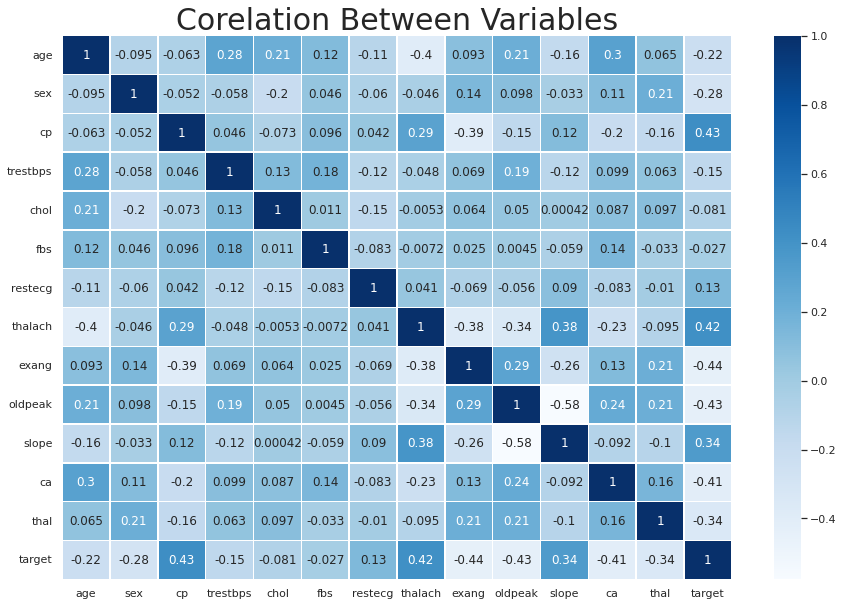

In [10]:
sns.set(style="white") 

plt.rcParams['figure.figsize'] = (15, 10) 

sns.heatmap(heart_csv.corr(), annot = True, linewidths=.5, cmap="Blues")

plt.title('Corelation Between Variables', fontsize = 30)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d5e84650>,
      dtype=object)

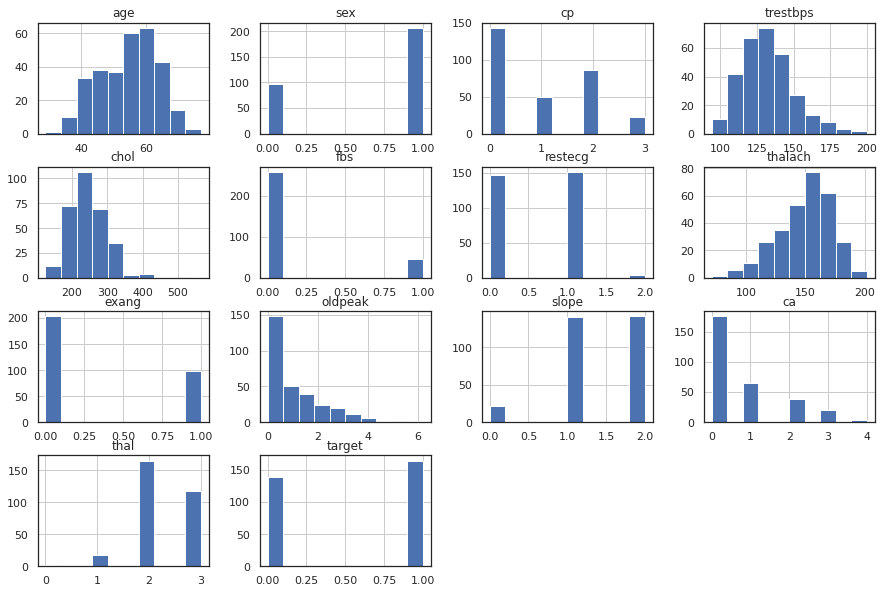

In [11]:
heart_csv.hist()

Text(0.5, 1.0, 'Count of each Target Class')

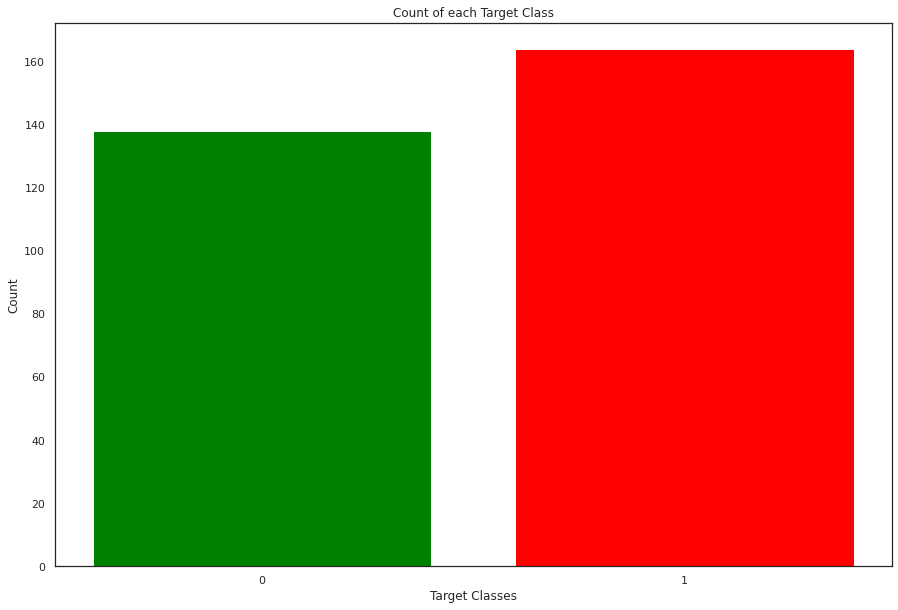

In [12]:
plt.bar(heart_csv['target'].unique(), heart_csv['target'].value_counts(), color = ['red', 'green'])

plt.xticks([0, 1])

plt.xlabel('Target Classes')

plt.ylabel('Count')

plt.title('Count of each Target Class')

In [13]:
y = heart_csv['target']

X = heart_csv.drop(['target'], axis = 1)

X_Scaled = StandardScaler().fit_transform(X)

In [14]:
print(X_Scaled)

[[ 0.94979429  0.68265615  1.97647049 ... -2.27118179 -0.71491124
  -2.1479552 ]
 [-1.92854796  0.68265615  1.005911   ... -2.27118179 -0.71491124
  -0.51399432]
 [-1.48572607 -1.46486632  0.0353515  ...  0.97951442 -0.71491124
  -0.51399432]
 ...
 [ 1.50332164  0.68265615 -0.93520799 ... -0.64583368  1.27497996
   1.11996657]
 [ 0.28556146  0.68265615 -0.93520799 ... -0.64583368  0.28003436
   1.11996657]
 [ 0.28556146 -1.46486632  0.0353515  ... -0.64583368  0.28003436
  -0.51399432]]


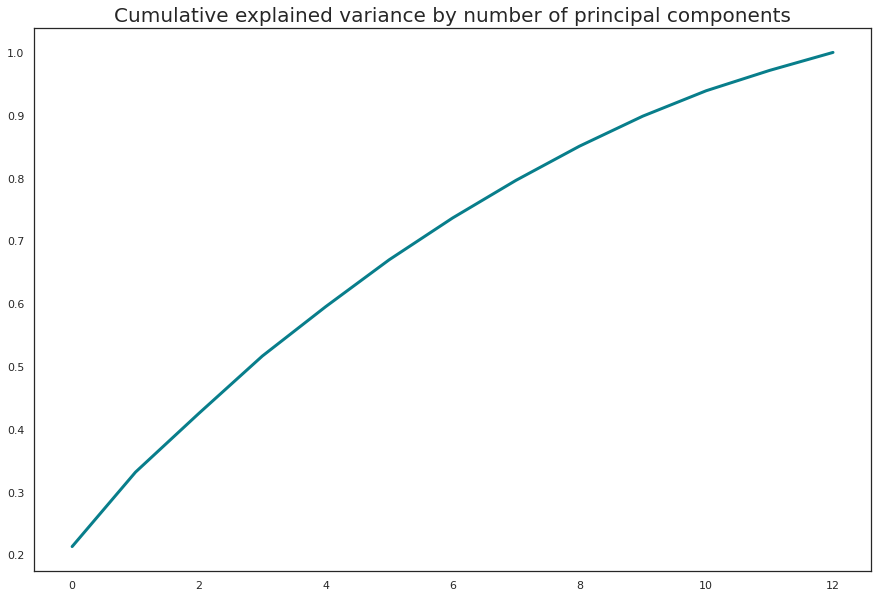

In [17]:

pca = PCA().fit(X_Scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [18]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
age       0.522316  0.507251  0.113403 -0.003108 -0.309279 -0.145859   
sex       0.156597 -0.461425 -0.578324 -0.361268  0.023231  0.037077   
cp       -0.454395  0.371797 -0.432832  0.262719  0.159757 -0.189616   
trestbps  0.308247  0.543733 -0.219145  0.011744  0.211654 -0.159031   
chol      0.189785  0.450470  0.488493 -0.310376  0.347290 -0.082485   
fbs       0.123409  0.396007 -0.522462 -0.143172 -0.268201  0.211014   
restecg  -0.209087 -0.271893  0.083844  0.304004 -0.365533 -0.679745   
thalach  -0.691073  0.100525 -0.154180 -0.223751  0.328858 -0.105801   
exang     0.597789 -0.330931  0.148160 -0.106348  0.033222  0.228548   
oldpeak   0.696418 -0.069582 -0.168193  0.339091  0.263359 -0.150885   
slope    -0.627540  0.068737  0.158767 -0.524040 -0.246461 -0.078065   
ca        0.486278  0.138266 -0.109639 -0.370632 -0.416937 -0.182365   
thal      0.368727 -0.246544 -0.090942 -0.438640  0.347398 -0.499674   

               PC7       PC8       PC9      PC10      PC11      PC12      PC13  
age      -0.213516 -0.248452 -0.286176 -0.017711 -0.097219  0.368578  0.092618  
sex      -0.157330 -0.161780 -0.157399  0.425675 -0.201915 -0.000700  0.036457  
cp       -0.210686  0.033872 -0.316841  0.107496  0.421058 -0.076773  0.010519  
trestbps  0.326888 -0.513155  0.296463  0.067880 -0.042449 -0.171744  0.020735  
chol      0.045717  0.324469 -0.171450  0.380679 -0.088925 -0.111406 -0.002567  
fbs       0.466610  0.382530 -0.149369 -0.125537 -0.110475  0.020795 -0.081158  
restecg   0.359243  0.091830 -0.027243  0.215298 -0.061879 -0.001002  0.046364  
thalach   0.093427  0.137262  0.319723  0.039359  0.007546  0.398202  0.180260  
exang     0.425971 -0.095147 -0.093809  0.140885  0.448724  0.146490  0.088832  
oldpeak  -0.106064  0.175170  0.198039  0.098535  0.013973  0.200699 -0.383078  
slope     0.053956 -0.233966 -0.009801  0.045064  0.136884  0.060400 -0.394923  
ca       -0.302966  0.236699  0.404866  0.041116  0.232071 -0.113027  0.105842  
thal      0.036589  0.018733 -0.216617 -0.430078  0.012671 -0.041414  0.009366

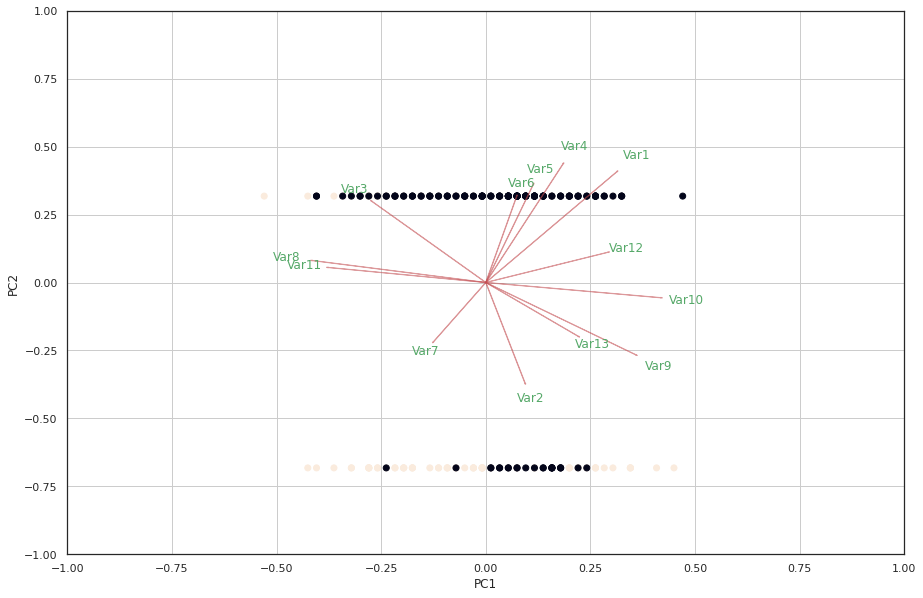

In [19]:
y = heart_csv['target']
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

#Call the function. Use only the 2 PCs.
myplot(X_Scaled[:,0:2],np.transpose(pca.components_[0:2, :]))

In [20]:
pca.explained_variance_ratio_

array([0.21313479, 0.11859478, 0.09359819, 0.09121102, 0.07870341,
       0.07455984, 0.0665423 , 0.05996334, 0.05432538, 0.04787944,
       0.04045134, 0.03239448, 0.02864168])

In [21]:
print(abs( pca.components_ ))

[[0.3132666  0.09392164 0.2725298  0.18487583 0.11382658 0.07401622
  0.12540304 0.41448147 0.35853249 0.4176868  0.37637662 0.29165252
  0.22114956]
 [0.40784766 0.3710019  0.2989378  0.43718082 0.3621942  0.31840408
  0.21861133 0.08082548 0.26608056 0.0559463  0.05526682 0.11117111
  0.19823027]
 [0.10263543 0.52341474 0.39173603 0.19833766 0.44211275 0.47285577
  0.07588339 0.1395415  0.13409279 0.15222403 0.14369294 0.09922948
  0.08230715]
 [0.00284966 0.33121828 0.24086648 0.01076673 0.2845592  0.13126315
  0.27871761 0.20513987 0.09750166 0.31088593 0.4804511  0.33980276
  0.40215433]
 [0.30525457 0.02292887 0.15767805 0.20890007 0.34277072 0.26471077
  0.36077579 0.32457874 0.03278934 0.25993177 0.24325336 0.41151118
  0.3428774 ]
 [0.14790741 0.03759732 0.19227814 0.16126354 0.08364325 0.21397681
  0.68928966 0.10728704 0.23175719 0.15300347 0.07916072 0.18492518
  0.50669006]
 [0.2291864  0.16887733 0.22614896 0.35088001 0.04907187 0.5008559
  0.38560918 0.10028411 0.4572343

In [22]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_Scaled)

In [23]:
print(principalComponents)

[[ 0.60302351  2.29191381 -2.8471531   2.33587563]
 [-0.4785882  -0.98841636 -1.49266653  2.23950166]
 [-1.84765545  0.02055853  0.35325155  0.44810689]
 ...
 [ 2.4831852   0.50400093 -2.15856072 -0.01221868]
 [ 1.76206175 -2.33369747 -0.49594398  0.46652372]
 [-0.86091503  1.06269601  0.64817655  0.31633179]]


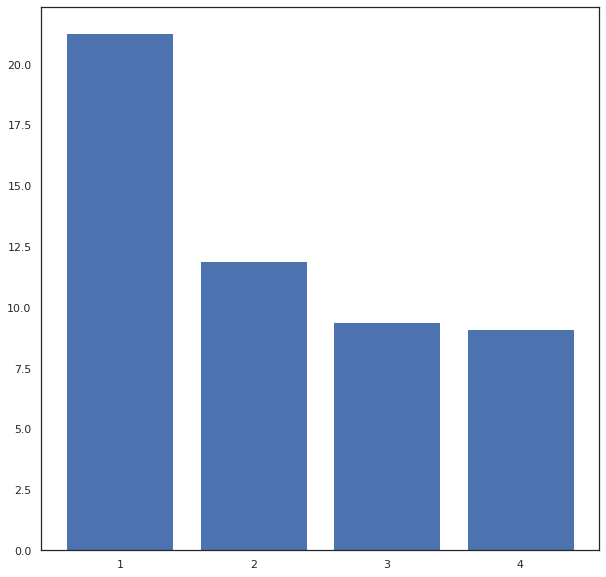

In [24]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()
PCA_components = pd.DataFrame(principalComponents)

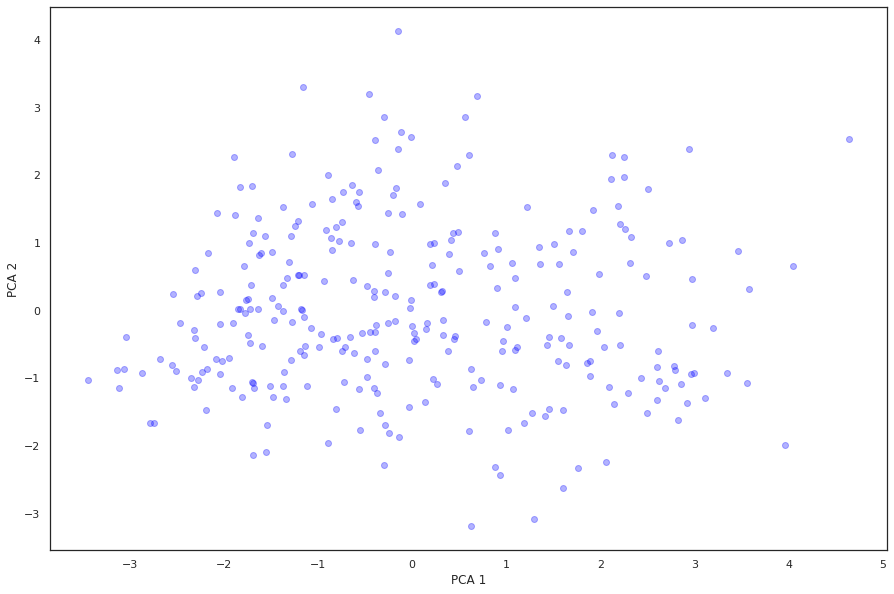

In [25]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [26]:
print(PCA_components)

            0         1         2         3
0    0.603024  2.291914 -2.847153  2.335876
1   -0.478588 -0.988416 -1.492667  2.239502
2   -1.847655  0.020559  0.353252  0.448107
3   -1.724377 -0.490040 -0.026776 -0.134268
4   -0.403288  0.278693  2.901997 -0.433701
..        ...       ...       ...       ...
297  1.112720 -0.550608  1.637427  0.576338
298 -0.727607 -1.055103 -0.699288  0.820136
299  2.483185  0.504001 -2.158561 -0.012219
300  1.762062 -2.333697 -0.495944  0.466524
301 -0.860915  1.062696  0.648177  0.316332

[302 rows x 4 columns]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(PCA_components,y, test_size=0.2)

In [28]:
print(X.shape, y.shape, X_test.shape, y_test.shape,y_test)

(302, 13) (302,) (61, 4) (61,) 25     1
111    1
160    1
91     1
274    0
      ..
68     1
155    1
6      1
159    1
88     1
Name: target, Length: 61, dtype: int64


Accuracy:0.825726
[[ 79  33]
 [  9 120]]


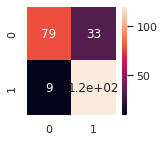

In [29]:
k_means = KMeans(n_clusters=2)

k_means.fit(X_train)

pred_train_kmeans = k_means.predict(X_train)

score_train_kmeans = accuracy_score(y_train,pred_train_kmeans)

print('Accuracy:{0:f}'.format(score_train_kmeans))


from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train,pred_train_kmeans))
plt.figure(figsize =(2,2))
sns.heatmap(confusion_matrix(y_train,pred_train_kmeans),annot=True)
plt.show()

Accuracy of testing:0.786885
[[17  9]
 [ 4 31]]


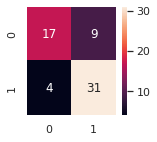

In [30]:
pred_test_kmeans = k_means.predict(X_test)

accu_test_kmeans =accuracy_score(y_test,pred_test_kmeans)

print('Accuracy of testing:{0:f}'.format(accu_test_kmeans))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred_test_kmeans))

plt.figure(figsize =(2,2))
sns.heatmap(confusion_matrix(y_test,pred_test_kmeans),annot=True)
plt.show()

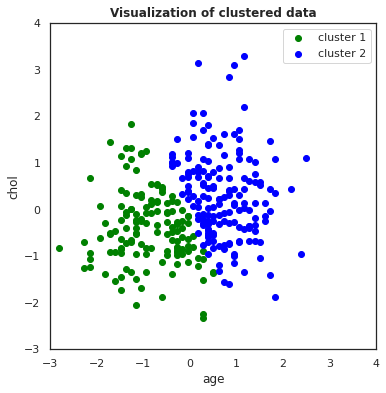

In [32]:
data = heart_csv[['age', 'chol']]
X_std = StandardScaler().fit_transform(data)
# Run local implementation of kmeans Here we tested 3 clusters
km = KMeans(n_clusters=2, max_iter=100, random_state = 42)
km.fit(X_std)

# labels_ are equivalent to calling fit(x) then predict
labels_ = km.predict(X_std)
labels_
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels_ == 0, 0], X_std[labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels_ == 1, 0], X_std[labels_ == 1, 1],
            c='blue', label='cluster 2')


plt.legend()
plt.xlim([-3, 4])
plt.ylim([-3, 4])
plt.xlabel('age')
plt.ylabel('chol')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [33]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(241, 4) (241,) (61, 4) (61,)


In [46]:
classifier_svm = SVC(kernel = 'rbf', C=1, gamma='auto')
CV =3 # choose number of folds
scores = cross_val_score(classifier_svm, X_train, y_train, scoring='accuracy', cv=CV)

print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")



0.8217078189300411 accuracy with a standard deviation of 0.030256447784883834


In [47]:
scores_test_svm = cross_val_score(classifier_svm, X_test, y_test, scoring='accuracy', cv=CV)
print(f"Accuracy of SVM (CV={CV}) on the test set: {scores_test_svm}")
print(scores_test_svm.mean())

Accuracy of SVM (CV=3) on the test set: [0.71428571 1.         0.75      ]
0.8214285714285715


In [42]:
LDA= LinearDiscriminantAnalysis()
CV = 3
scores_LDA = cross_val_score(LDA, X_train, y_train, scoring='accuracy', cv=CV)
print(f"{scores_LDA.mean()} accuracy with a standard deviation of {scores_LDA.std()}")

0.8258744855967078 accuracy with a standard deviation of 0.029554069607494238


In [43]:
scores_test_lda = cross_val_score(LDA, X_test, y_test, scoring='accuracy', cv=CV)
print(f"Accuracy of LDA (CV={CV}) on the test set: {scores_test_lda}")
print(scores_test_lda.mean())

Accuracy of LDA (CV=3) on the test set: [0.76190476 0.95       0.75      ]
0.8206349206349207
